In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ds import *
dropna=False
data_train = Data_Loader('train_file.xlsx',train=True,dropna=dropna)

In [3]:
# visualize
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\wingk\AppData\Local\Continuum\miniconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'
from torchviz import make_dot
X = data_train.X.copy()
for col in data_train.cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])
X1 = X.loc[:,data_train.cat_cols].copy().values.astype(np.int64)
X2 = X.drop(columns=data_train.cat_cols).copy().values.astype(np.float32)
y = torch.LongTensor(LabelEncoder().fit_transform(data_train.y))
device = get_default_device()

train_ds = NNDataLoader(X1,X2,y)
train_dl = DataLoader(train_ds, batch_size=1000,shuffle=True)
train_dl = DeviceDataLoader(train_dl, device)
for x1, x2, y in train_dl:
    break;
nn_model = NN(data_train)
model = NNModel(nn_model.embedding_sizes, len(nn_model.cont_cols))
output = model(x1, x2)
dot = make_dot(output)
dot.format = 'png'
dot.render("nn")

C:\Users\wingk\Downloads\interview_Daiichi_Sankyo\ds.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[col] = LabelEncoder().fit_transform(self.X[col])


self.n_emb 53


'nn.png'

In [3]:
nn_model = NN(data_train)
model = NNModel(nn_model.embedding_sizes, len(nn_model.cont_cols))
pytorch_total_params = sum(p.numel() for p in model.parameters())
print('Total number of parameters',pytorch_total_params)
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Total number of trainable parameters',pytorch_total_params)

self.n_emb 53
Total number of parameters 13644
Total number of trainable parameters 13644


C:\Users\wingk\Downloads\interview_Daiichi_Sankyo\ds.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[col] = LabelEncoder().fit_transform(self.X[col])


In [3]:
# number of nans
data_train.X.apply(lambda x: 'unknown' in x.values.tolist(),axis=1).sum()

0

Continuous variables
           duration           age
count  32910.000000  32910.000000
mean     258.164327     40.014099
std      259.070260     10.402948
min        0.000000     17.000000
25%      103.000000     32.000000
50%      180.000000     38.000000
75%      319.000000     47.000000
max     4918.000000     98.000000
The observations in each categorical variable sorted by frequency
campaign dict_items([(1, 14104), (2, 8463), (3, 4295), (4, 2110), (5, 1251), (6, 773), (7, 491), (8, 329), (9, 220), (10, 187), (11, 142), (12, 92), (13, 74), (14, 52), (17, 51), (15, 45), (16, 42), (18, 27), (20, 22), (21, 20), (19, 16), (22, 13), (23, 12), (24, 12), (27, 9), (25, 8), (31, 7), (29, 7), (26, 7), (28, 6), (30, 6), (35, 4), (33, 3), (43, 2), (32, 2), (42, 2), (34, 1), (37, 1), (40, 1), (56, 1)])
contact dict_items([('cellular', 20890), ('telephone', 12020)])
day_of_week dict_items([('thu', 6849), ('mon', 6802), ('wed', 6508), ('tue', 6439), ('fri', 6312)])
default dict_items([('no', 25

C:\Users\wingk\Downloads\interview_Daiichi_Sankyo\ds.py:93: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.y = Y


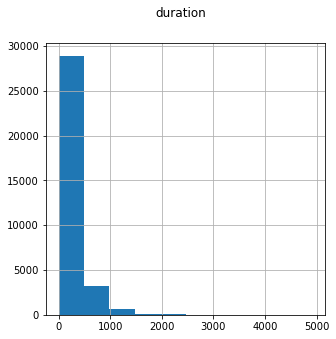

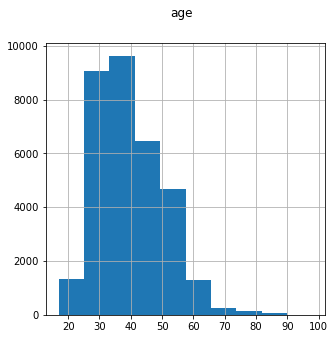

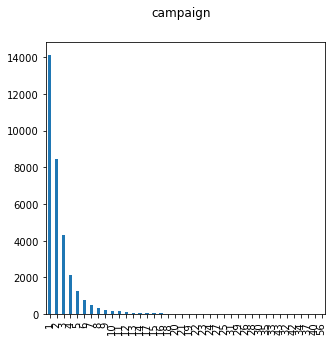

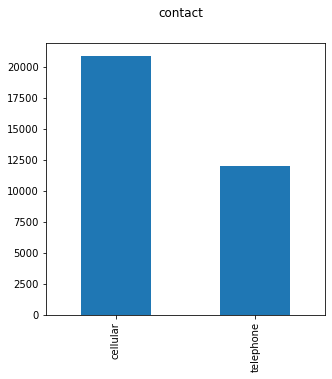

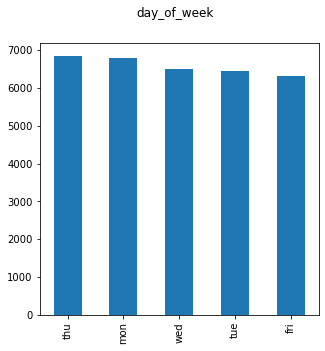

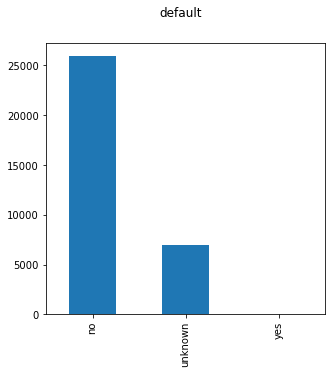

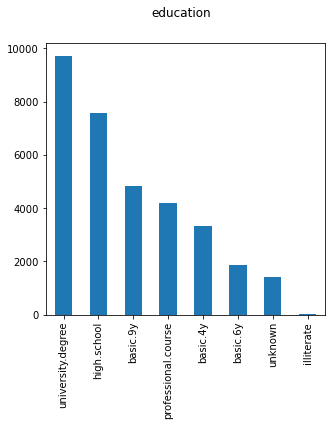

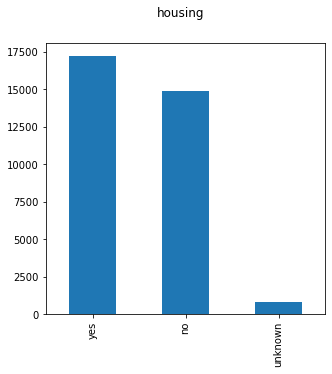

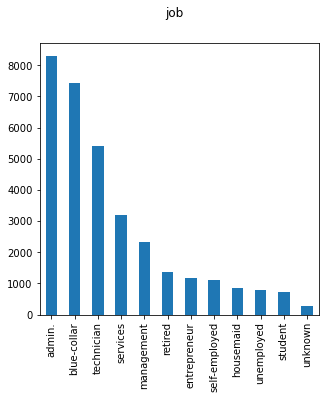

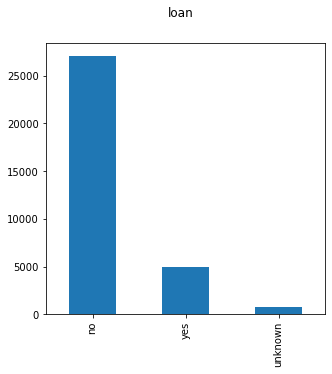

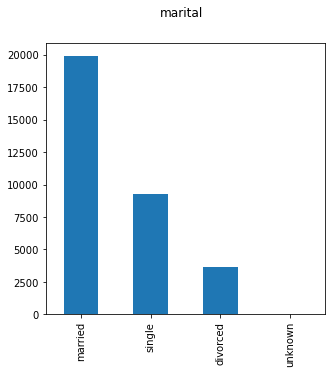

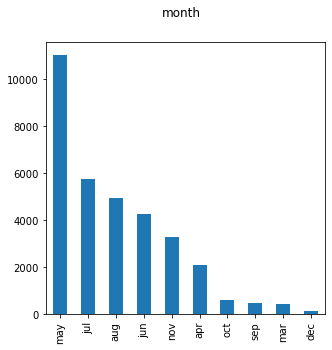

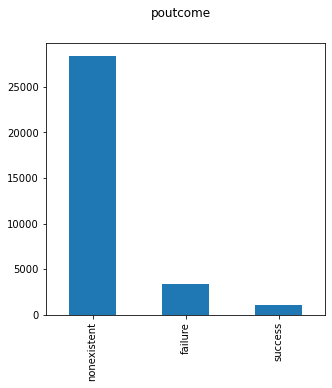

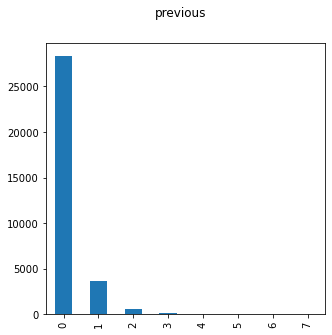

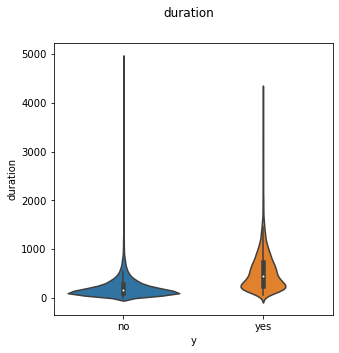

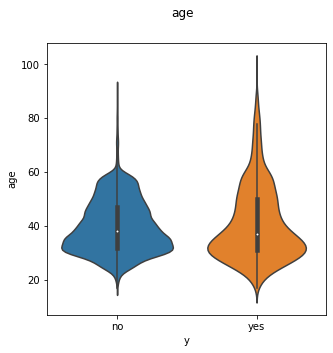

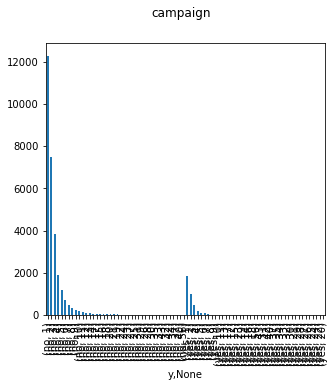

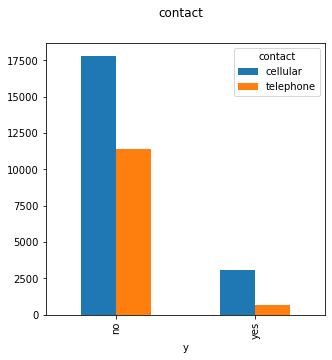

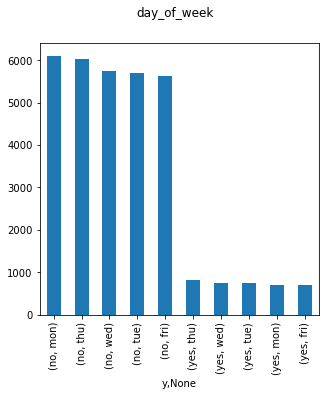

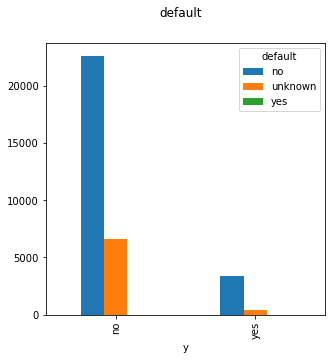

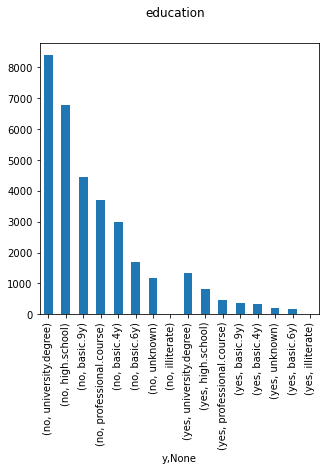

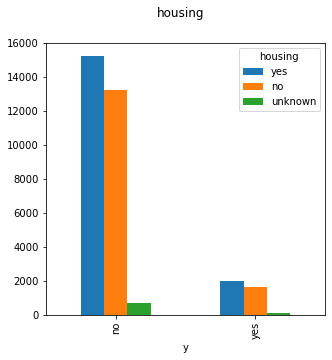

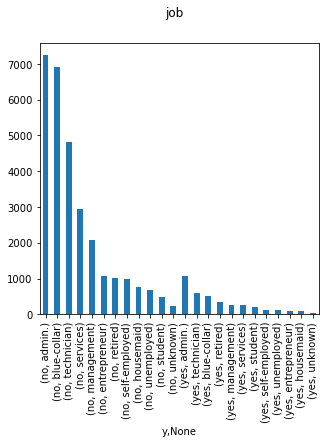

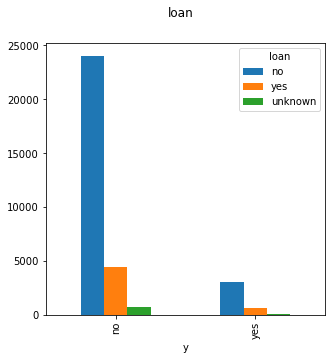

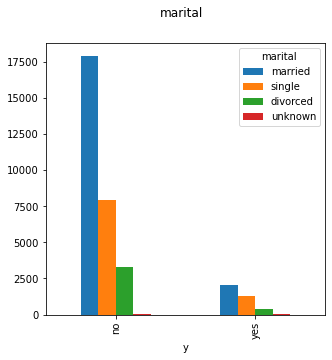

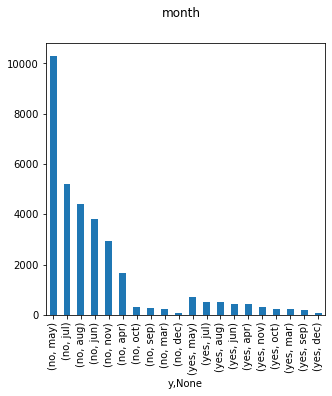

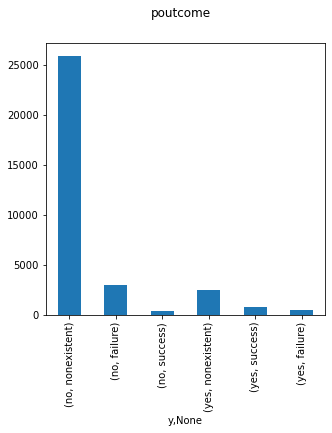

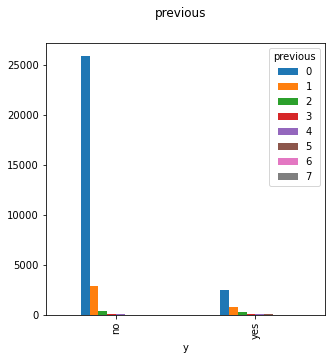

In [14]:
EDA(data_train)

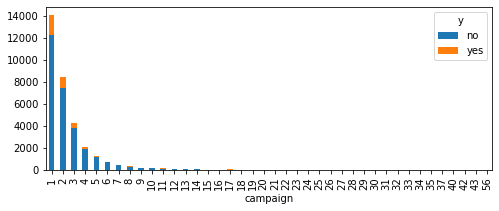

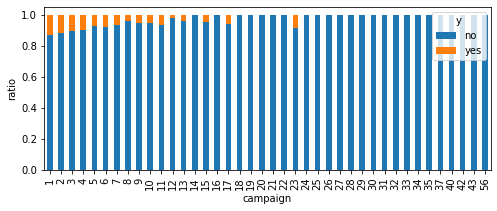

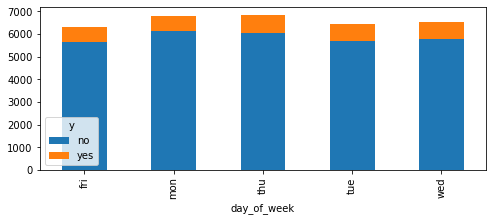

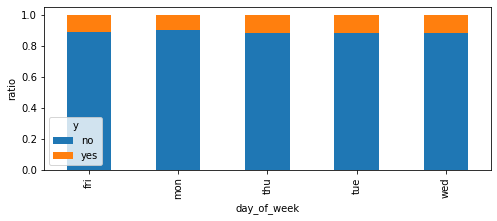

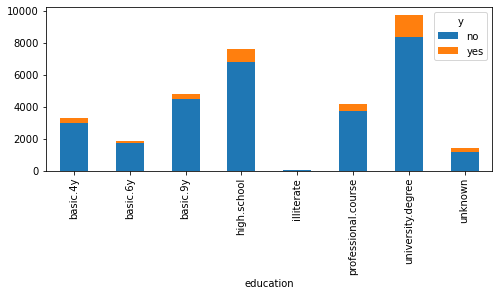

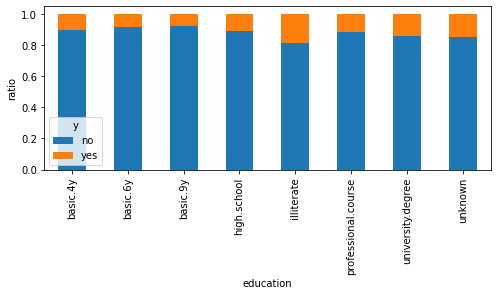

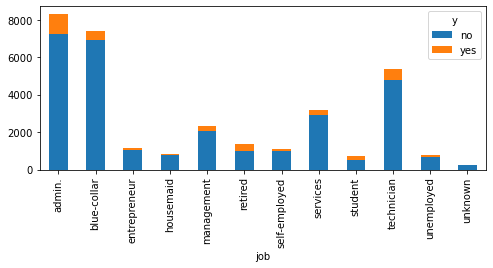

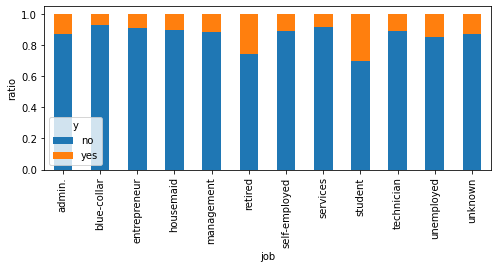

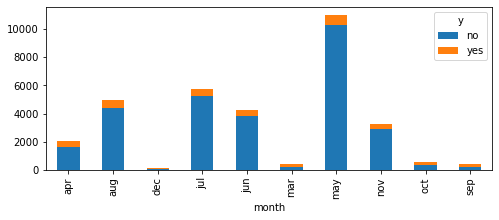

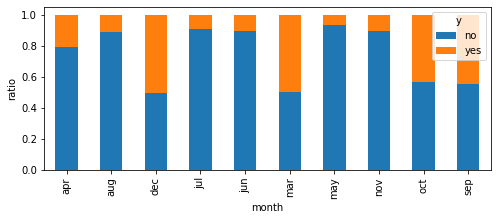

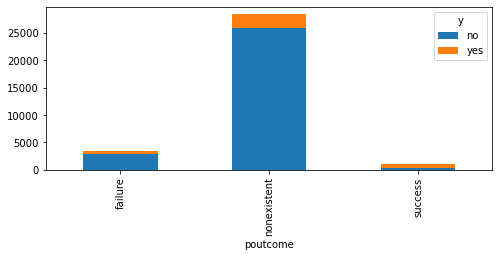

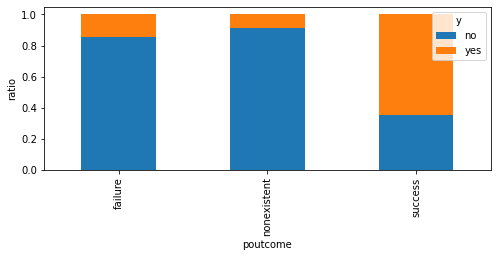

In [60]:
for name in ['campaign','day_of_week','education','job','month','poutcome']:
    df = data_train.data.groupby('y').apply(lambda x: x[name].value_counts()).reset_index().pivot(index='level_1',columns='y',values=name)
    fig,ax = plt.subplots(1,1,figsize=(8,3))
    df.plot.bar(stacked=True,ax=ax)
    ax.set_xlabel(name)
    df[['no','yes']] = df.apply(lambda x: x[['no','yes']]/sum(x[['no','yes']]),axis=1)
    fig,ax = plt.subplots(1,1,figsize=(8,3))
    df.plot.bar(stacked=True,ax=ax)
    ax.set_xlabel(name)
    ax.set_ylabel('ratio')

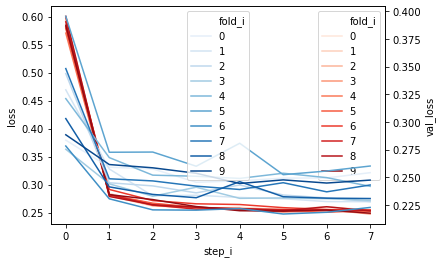

In [61]:
# Losses in nn
with open('drop_na/hist_nn.pickle','rb') as f:
    hist_nn = pickle.load(f)
    
# print loss / validation loss
losses_df = pd.DataFrame(hist_nn)
losses_df['fold_i'] = list(itertools.chain.from_iterable([[i]*8 for i in range(10) ]))
losses_df['step_i'] = list(itertools.chain.from_iterable([range(8) for i in range(10) ]))
fig,ax1 = plt.subplots(1,1,figsize=(6,4))
ax2 = ax1.twinx()
sns.lineplot(data=losses_df,x='step_i',y='loss',hue='fold_i',ax=ax1,palette=sns.color_palette("Reds",10))
sns.lineplot(data=losses_df,x='step_i',y='val_loss',hue='fold_i',ax=ax2,palette=sns.color_palette("Blues",10))


# Performance

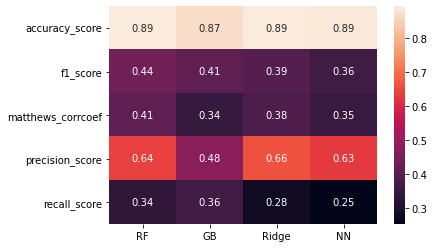

In [4]:
# using the set without unknowns
ev = Evaluate()
ev_df = pd.DataFrame(ev.performance)
sns.heatmap(ev_df,annot=True)

# Feature importance

In [5]:
with open('drop_na/fi.pickle','rb') as f:
    fi = pickle.load(f)

[Text(0, 0, 'duration'),
 Text(0, 0, 'poutcome_2'),
 Text(0, 0, 'month_5'),
 Text(0, 0, 'month_6'),
 Text(0, 0, 'previous_0'),
 Text(0, 0, 'month_8'),
 Text(0, 0, 'age'),
 Text(0, 0, 'previous_1'),
 Text(0, 0, 'contact_0'),
 Text(0, 0, 'poutcome_0')]

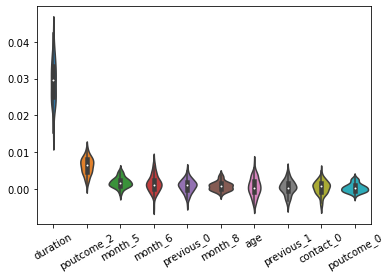

In [55]:
fi_df = pd.DataFrame(np.stack([fi['feat_imp'][i]['importances'] for i in range(10)],axis=1).reshape((95,100)),index=fi['X_new_cols']).T
fi_ranks = fi_df.describe().T
fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.violinplot(data=fi_df[fi_ranks.sort_values('mean',ascending=False).head(10).index.tolist()],ax=ax,)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

array([ 0.        ,  0.00247117, -0.00123558, -0.00082372,  0.00205931,
       -0.00041186,  0.00041186,  0.00164745, -0.00082372, -0.00041186])